#                                Bengaluru Real Estate Data Analysis

### A Capstone Project for Applied Data Science Capstone - IBM/Coursera 

#### Done by:  Shravan Bharadwaj

## Table of Contents

1. Introduction: Problem Statement
2. Data
3. Methodology
4. Analysis
5. Results and Discussion
6. Conclusion 
7. Refrences

## 1. Introduction

#### 1.1. Background:
Bengaluru is one of the major metropolitan cities of India, often dubbed as the ‘Silicon City of India’. It is the capital of Karnataka and is one of the major hubs of the IT industry. It is home to more than 1 Crore i.e. 10 million people. Bengaluru is divided into 198 neighborhoods or wards.
      
The Real Estate of Bengaluru is developing rapidly and it is quite expensive to buy a plot of land. Thus, it is very important to know the information regarding any neighborhood while investing in any real estate.

#### 1.2. Problem:
In this project, Data analysis of Bengaluru Real Estate Prices will be done using data science methods. Data like prices, availability of water, proximity towards Metro, Hospital, Market etc. will be done by making use of data from various sources. The data will be clustered using a machine learning algorithm and the outcome will be presented using a dashboard application.

#### 1.3. Targeted Audience:

The targeted audience is any individual or organization who intends to invest in the real estate of Bengaluru. This project enables them to get necessary insights from the analysis of data like Price Rates, Water Source, Proximity towards important venues like metro, hospital, grocery store etc. which are important for day-to-day life activities. 

The investor would also get to know the important insights like Average prices of a land in Bengaluru. With the analysis of clustering, the investor would get to know which neighborhoods have their advantages and disadvantages while buying any plot of land in any area.

By the application of dashboard (which will be presented in the program), the investor can select the neighborhood of his desire and the important details like Price, Water Source, Population Residing and Proximity towards venues will be presented. Other important maps will also be presented.


## 2. Data

#### 2.1. Factors of Influence:
Based on the problem stated above, following are the factors which influence in the analysis:

1.	Neighborhood Site Price Data in Rupees per Square Feet for prices estimation.
2.	Kaveri River Water Availability based on the supply of water in number of days in a week in each neighborhood.

Note: River Kaveri is the major river which supplies water to Bengaluru. Other supplies of water would be small lakes and groundwater. Here Kaveri water availability is used in the analysis. 

3.	The question of how close are important venues like metro, hospital, grocery store, clothing store, bank etc. to the neighborhood, is a very important factor which comes in play while buying any plot of land


#### 2.2. Data Sources:
Following are the data sources where data will be extracted:
1.	Real Estate price data from websites like MagicBrics, 99 Acres, Makaan and Housing.com
2.	Kaveri water availability from the website of Bangalore Water Supply and Sewage Board.
3.	Bengaluru ward data from BBMP.
4.	Venue data from Foursquare API


## 3. Methodology

#### 3.1. Data Importing:

1.	The data of house prices is imported by different websites stated above by copying it to excel. Data is not scraped from the website because the pages contain multiple pages within a page and all the data could not be scrapped. Also, the names of areas are not in conjunction with the BBMP neighborhood data.

2.	The Data of Kaveri water availability is imported from the website of BWSSB by copying it to excel. Data is not scraped because the data could not be scraped from the website.

3.	The Bengaluru ward data is imported as a CSV file. It has all the data like Latitudes, Longitudes, Population, Borough name and Ward name.

4.	Venue data are obtained from Foursquare API for getting the distance of venues located near the ward.

5.	Bengaluru ward Geojson file is imported as a Geojson file from BBMP.

#### 3.2. Data Cleaning:

1.	All 198 wards are matched with the Site prices manually in Excel Sheet.

2.	The 198 wards all have their latitude, longitude and population.

3.	The data of Kaveri data has timings related to the availability of water in a week. Some areas get the water alternate days in a week, three days in a week, two days in week, one day in a week and some do not get Kaveri water. Depending on the no of days Kaveri water is available, the number of days is assigned to a ward/neighborhood.

4.	All the data is combined and converted to a CSV file. The CSV file is read in the Jupyter Notebook for processing.


#### Import Libraries
    
    Let us import all the important libraries required for the analysis.

In [1]:
import numpy as np   # numpy
import copy  # copy

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

from sklearn.preprocessing import StandardScaler  # Normalizing Data

# Importing libraries for Dash
import dash # For Dash
import dash_html_components as html # For Dash html components
import dash_core_components as dcc  # For Dash graphs
from dash.dependencies import Input, Output, State
from jupyter_dash import JupyterDash      # For Dash
import plotly.graph_objects as go         # For Dash plotting
import plotly.express as px               # For Dash
from dash import no_update                # For Dash
import plotly.graph_objects as go         # For Dash tables

print('Libraries imported.')

Libraries imported.


#### Import Neighbohood Data
        Lets import all the 198 wards of Bengaluru. This is in the form of a CSV File. It contains the data of 198 wards, cordinates, population, Price per square feet in rupees and Kaveri Water Avaliability on a weekly basis.
#### Read CSV File:

In [2]:
bng_data_ = pd.read_csv('bengaluru_main_df.csv')  # Read CSV File.
print(bng_data_.shape)                            # Print the shape of the data frame.
bng_data_.head()                                  # Print the first 5 rows of the data frame.

(198, 8)


Unnamed: 0     Borough              Neighborhood   Latitude  Longitude  \
0           0   Yelahanka          Chowdeswari Ward  13.121710  77.580420   
1           1   Yelahanka                    Atturu  13.102805  77.560036   
2           2   Yelahanka  Yelahanka Satellite Town  13.090986  77.583920   
3           3  K.R. Puram               Vijnanapura  13.006063  77.669560   
4           4  K.R. Puram              Basavanapura  13.016847  77.715454   

   Population Price  Kaveri  
0       19626  3644       2  
1       24020  3295       2  
2       25782  3900       2  
3       35087  5840       0  
4       22012  4000       0

#### Clean the Dataframe and Copy into a new Data Frame:

In [3]:
bng_data_.drop_duplicates(inplace=True)        # Drop Duplicates if any. 
bng_data_.reset_index(drop=True, inplace=True) # Reset Index if there is any index errors.
bng_data_.drop(labels='Unnamed: 0',axis=1,inplace=True)  # Drop the 'Unnamed: 0' column.
bng_data = bng_data_.copy()                    # Copy the data into a new data frame. All changes will be made to this DF.

#### Let us look at the Dataframe:

In [4]:
print(bng_data_.shape)        # Print the shape of the data frame.
bng_data.head(5)              # Print the first 5 rows of the data frame.

(198, 7)


Borough              Neighborhood   Latitude  Longitude  Population  \
0   Yelahanka          Chowdeswari Ward  13.121710  77.580420       19626   
1   Yelahanka                    Atturu  13.102805  77.560036       24020   
2   Yelahanka  Yelahanka Satellite Town  13.090986  77.583920       25782   
3  K.R. Puram               Vijnanapura  13.006063  77.669560       35087   
4  K.R. Puram              Basavanapura  13.016847  77.715454       22012   

  Price  Kaveri  
0  3644       2  
1  3295       2  
2  3900       2  
3  5840       0  
4  4000       0

#### Get Cordinates of Bengaluru:

In [5]:
address = 'Bengaluru, KA.'                                   # Address of Bengaluru.
geolocator = Nominatim(user_agent='bngl_explorer')           # geolocator object.
location = geolocator.geocode(address)                       # Location details.
lati_bngl = location.latitude                                # Latitude of Bengaluru.
longi_bngl = location.longitude                              # Longitude of Bengaluru.
print(f'The latitude and longitude of Bengaluru is {lati_bngl} and {longi_bngl}.')

The latitude and longitude of Bengaluru is 12.9791198 and 77.5912997.


#### Plot a Map of Bengaluru with all the 198 wards:

In [6]:
map_bengaluru=folium.Map(location=[lati_bngl,longi_bngl],zoom_start=10)    # Map of Bengaluru using Folium library.

# Update the Map with all areas:
for areas, lat, longi in zip(bng_data['Neighborhood'], bng_data['Latitude'], bng_data['Longitude']):
    label='{}.'.format(areas)                                  # Label of each Neighborhood.
    label=folium.Popup(label,parse_html=False)                 # Label as Popup in Map.
    folium.CircleMarker([lat,longi], radius=5, popup=label, color='green', fill=True, 
                        fill_color='green', fill_capacity=0.9, parse_html=False).add_to(map_bengaluru)

map_bengaluru   # Display Map.

### Venue Extraction:
1.The next process is to extract the venues nearby each neighborhood by using Foursquare API.

2.Nine Venues of different types like Metro, Hospital, Clothing Store, Grocery Store, Bank, Sports Center, Schools, Colleges /University, Movie theaters will be searched.

3.According to a specific order of categories, the minimum distance from the neighborhood location will be extracted. For example, in Grocery Store, there may be Super Market, Grocery Store, Fruit Market, Farmers Market etc. different categories. Our preferred order will be Super Market, Grocery Store.

4.The minimum distance will be used for clustering analysis.


#### Foursquare Credentials

In [ ]:
CLIENT_ID = ''     # your Foursquare ID.
CLIENT_SECRET = '' # your Foursquare Secret.
VERSION = '20180605'                                               # Foursquare API version.

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#### Define some constants for the URL:

In [7]:
LIMIT = 100                  # Limit of venues to be extracted is 100.
radius_metro = 5000          # Limit to search a metro station in metres from the given location.
radius = 3000                # Limit to search other venues in metres from the given location.

#### Define Preference List in order of preference:
        These list will be used to find the minimum distance of a venue from the specified location depending 
        on the order of preference of categories.

In [8]:
li_metro = ['Metro']                                            # Metro

li_hosp =['Hospital']                                           # Hospital

li_gross = ['Supermarket', 'Grocery Store']                     # Grocery Store

li_cloth = ['Clothing Store', "Women's Store", "Men's Store"]   # Clothing Store

li_school =['School', 'High School']                            # School 

li_movie = ['Multiplex', 'Movie Theater']                       # Movie 

li_uni = ['University', 'College']                              # College/ University

li_sports = ['Park', 'Gym', 'Pool']                             # Sports

li_bank =['Bank', 'ATM']                                        # Bank

#### Define a Dataframe for the Dashboard:
            This dataframe will be used for the dashboard. It contain all the details of venues and its distance 
    from the neighborhood.

In [9]:
col_prox= ['Neighborhood','Price in Rs per SQ.FT.','Metro Closeby','Hospital Closeby','Grocery Closeby',
           'Schools Closeby','Movie Theaters Closeby', 'Clothing Store Closeby','University Closeby', 
           'Sports Center Closeby','Bank Closeby' ]              # List of columns.
df_prox = pd.DataFrame(columns =col_prox)                 # Create the datadrame

#### Define a function to get the venue details:
        1. This functions takes the URL and gets the data from Foursquare into a JSON file.
        2. The JSON file gets flattened to a dataframe.
        3. Details like name, distance and category gets extracted to a new dataframe.
        4. After extraction, it calls another function to get the minimum distance of a venue 
           depending on the order of preference of categories.

In [10]:
def get_details_4square(url, li=None, radius=None, neighborhood=None):
    ''' Returns a Data Frame of Name, Minimum Distance and Category Name w.r.t. the url.'''
    
    # A try-except block to handle ConnectionError.
    try:                                        
        # Get the data from url.
        data = requests.get(url).json()
        data_items = data['response']['venues']

        # Create a Data Drame for storing Neighborhood, Name, Distance and Category.
        col = ['Neighborhood','Name', 'Distance', 'Category']
        df = pd.DataFrame(columns = col)

        # Flattening the json file into a dataframe.
        df_raw = json_normalize(data_items)
        li_name, li_dist, li_category = [], [], []

        # try-except block to handle ValueError or KeyError.
        try:
            # A loop to extract the data.
            for names, dist, category in zip(df_raw['name'], df_raw['location.distance'], df_raw['categories']):
                li_name.append(names)
                li_dist.append(dist)
                li_category.append(category[0]['name'])
        except:
            li_name.append('No Venue')
            li_dist.append(radius)
            li_category.append('No Category')
                
        # Store the values to the Data Frame.
        li_neigh =[neighborhood] * len(li_name)
        df['Neighborhood'] = li_neigh
        df['Name'] = li_name
        df['Distance'] = li_dist
        df['Category'] = li_category

        # Call function to get minimum distance venue.
        mini, name, cat= get_minimum_distance_venue(df,li,radius)
        
    except ConnectionError as e:
        print(e)
        r = "No response"
    
    return df, mini, name, cat  # Return dataframe, minimum distance, name of the venue and its category,
    

#### Define Function to get the Minimum Distance Venue:

In [11]:
def get_minimum_distance_venue(df,li,radius):
    '''Retuns the minimum distance and its respective venue name and category.'''
    
    # Define list to get all the details of venues, distance and category.
    li_name, li_dist , li_cat= [], [], []
    
    # If section only for Metro Venue Call.
    if li[0] == 'Metro':
        for name,dist,cat in zip(df['Name'],df['Distance'],df['Category']):
            if li[0] in name:           # If 'Metro' in name of venue.
                li_name.append(name)    # Append name to list.
                li_dist.append(dist)    # Append distance to list
                li_cat.append(cat)      # Append categoy yo list.
    # Else section for othe Venue Call.
    else:
        cnt=0                        # Counter for checking order of preference.
        for i in li:                 # Loop the order of preference list.
            for name,dist,cat in zip(df['Name'],df['Distance'],df['Category']):    # Loop the data frame.
                if i in cat:                    # If i [list category] is in category
                    li_name.append(name)        # Append name to list.
                    li_dist.append(dist)        # Append distance to list
                    li_cat.append(cat)          # Append categoy yo list.
            if len(li_name)>0:  # If the category in our list is there in dataframe, it goes inside this statement. 
                cnt+=1          # Counter gets updated.
            if cnt==1:          # If counter is 1.
                break           # Break the loop.

    # try-except block to handle ValueError
    try:          
        mini = min(li_dist)        # Minimum distance
    except:
        mini = radius              # The radius passed by the call.
        name = 'No Venues Found. Venues are Greater than the proximity Distance.'
        cat = 'No Categories'
    else:
        ind = li_dist.index(mini)  # Index at which minimum distance was there.
        name = li_name[ind]        # Name of the venue at the index.
        cat  = li_cat[ind]         # Category of the venue at the index.
        
    return mini, name, cat         # Return minimum distance, name of the venue and it category.


#### Get the Venue details:
        1. By using a loop over the original data frame of wards, pass the different URL to the functions
           defined.
        2. Obtain the minimum distance venues and other details.
        3. Update the data frame for clustering and the data frame for dashboard.

In [ ]:
for area, lati, longi, price in zip(bng_data['Neighborhood'], bng_data['Latitude'], bng_data['Longitude'], bng_data['Price']):

    # Metro URL
    url_metro ='https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4bf58dd8d48988d1fd931735&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius_metro)
    # Hospital URL
    url_hospital = 'https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4bf58dd8d48988d196941735&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius)
    # Grocery URL
    url_gross='https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4bf58dd8d48988d1f9941735&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius)
    # School URL
    url_school='https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4bf58dd8d48988d13b941735&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius)
    # Movie URL
    url_movie='https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4bf58dd8d48988d17f941735&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius)
    # Clothing URL.
    url_cloth='https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4bf58dd8d48988d103951735&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius)
    # Bank URL.
    url_bank='https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4bf58dd8d48988d10a951735&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius)
    # University URL.
    url_uni='https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4d4b7105d754a06372d81259&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius)
    # Sports URL
    url_sports='https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId=4d4b7105d754a06377d81259&client_id={}&client_secret={}&limit={}&v={}&radius={}'.format(lati, longi,CLIENT_ID, CLIENT_SECRET, LIMIT, VERSION, radius)
    
    
    # Calling for different venues.
    df_metro, mini_metro, n_metro, cat_metro = get_details_4square(url_metro, li_metro, radius_metro , area)
    
    df_hospital, mini_hospital, n_hospital, cat_hospital = get_details_4square(url_hospital,li_hosp, radius, area )
    
    df_gross, mini_gross, n_gross, cat_gross = get_details_4square(url_gross, li_gross, radius, area)
    
    df_school, mini_school, n_school, cat_school = get_details_4square(url_school, li_school, radius, area)
    
    df_movie, mini_movie, n_movie, cat_movie = get_details_4square(url_movie, li_movie, radius, area)
    
    df_cloth, mini_cloth, n_cloth, cat_cloth = get_details_4square(url_cloth, li_cloth, radius, area )
    
    df_bank, mini_bank, n_bank, cat_bank = get_details_4square(url_bank, li_bank, radius, area )
    
    df_uni, mini_uni, n_uni, cat_uni = get_details_4square(url_uni, li_uni, radius, area )
    
    df_sports, mini_sports, n_sports, cat_sports = get_details_4square(url_sports, li_sports, radius, area )
    
    
    
    # Appending to Dataframe for clustering
    df = df.append({'Neighborhood':area, 'Latitude':lati, 'Longitude':longi,'Price':price ,'Metro': mini_metro, 
                    'Hospital':mini_hospital, 'Grocery':mini_gross, 'School':mini_school, 'Movie':mini_movie,
                    'Clothing':mini_cloth, 'University':mini_uni, 'Sports':mini_sports,
                    'Bank':mini_bank},ignore_index =True)
    
    # Append Dataframe for Dashboard
    
    df_prox = df_prox.append({'Neighborhood':area,'Price in Rs per SQ.FT.':price,
            'Metro Closeby' : '{}\n ({}) \n Proximity: {} mts'.format(n_metro,cat_metro,mini_metro),
            'Hospital Closeby' : '{}\n ({}) \n Proximity: {} mts'.format(n_hospital,cat_hospital,mini_hospital),
            'Grocery Closeby' : '{}\n ({}) \n Proximity: {} mts'.format(n_gross,cat_gross,mini_gross),
            'Schools Closeby': '{}\n ({}) \n Proximity: {} mts'.format(n_school,cat_school,mini_school),
            'Movie Theaters Closeby' :  '{}\n ({}) \n Proximity: {} mts'.format(n_movie,cat_movie,mini_movie),
            'Clothing Store Closeby' : '{}\n ({}) \n Proximity: {} mts'.format(n_cloth,cat_cloth,mini_cloth),
            'Bank Closeby' : '{}\n ({}) \n Proximity: {} mts'.format(n_bank,cat_bank,mini_bank),
            'Sports Center Closeby' : '{}\n ({}) \n Proximity: {} mts'.format(n_sports,cat_sports,mini_sports),
            'University Closeby' : '{}\n ({}) \n Proximity: {} mts'.format(n_uni,cat_uni,mini_uni)  
                             },ignore_index= True)

#### NOTE: 
##### The Foursquare account was just a Sandbox Account and only 950 could can be made in a day. Since, the above loop calls 1782 calls, it is not possible to get all the venue details in one single day. 

###### Therfore over a period of 2 days the main dataframe was split into two and then venue details were extracted. The extracted venue dataframe was cleaned and joined ( for both 'df' and "df_prox" ). These files were saved as csv files and it will be imported for further analysis. 

In [49]:
# A dataframe which has the neareast proximity values, water source and price per sq. ft.
df = pd.read_csv('bengaluru_to_be_clustered.csv') 

# A dataframe which has all the details of neareast venues, price per sq. ft., water source and population.
# It will be used in Dashboard.
df_prox = pd.read_csv('bengaluru_for_dashboard.csv')

#### Lets check the two dataframes

In [50]:
df.head() # A dataframe which has the neareast proximity values, water source and price per sq. ft.

Unnamed: 0              Neighborhood   Latitude  Longitude   Price  Metro  \
0           0          Chowdeswari Ward  13.121710  77.580420  3644.0   5000   
1           1                    Atturu  13.102805  77.560036  3295.0   5000   
2           2  Yelahanka Satellite Town  13.090986  77.583920  3900.0   5000   
3           3               Vijnanapura  13.006063  77.669560  5840.0   1655   
4           4              Basavanapura  13.016847  77.715454  4000.0   5000   

   Hospital  Grocery  School  University  Movie  Clothing  Sports  Bank  \
0      1842     3133     525        1007   3427      2617    2408  1272   
1      1380     1441    1501        1942   2653      1788    2110  1879   
2       758     1250     975         807   1271       337     794   524   
3       623      744     910         930   1568       727     854   929   
4       949      682    1065        1132   3026      2189     760   789   

   Kaveri  
0       2  
1       2  
2       2  
3       0  
4       0

In [51]:
df_prox.head(1)    # A dataframe for dashboard

Unnamed: 0      Neighborhood Price in Rs per SQ.FT.  \
0           0  Chowdeswari Ward                   3644   

                                       Metro Closeby  \
0  No Venues Found. Venues are Greater than the p...   

                                    Hospital Closeby  \
0  Neha Prakash Hospital\n (Hospital) \n Proximit...   

                                     Grocery Closeby  \
0  royalmart SUPERMARKET\n (Supermarket) \n Proxi...   

                                     Schools Closeby  \
0  Kendriya Vidyalaya Crpf\n (School) \n Proximit...   

                      Movie Theaters Closeby  \
0  Imax\n (Multiplex) \n Proximity: 3427 mts   

                              Clothing Store Closeby  \
0  Jockey @Yelahanka\n (Clothing Store) \n Proxim...   

                               University Closeby  \
0  sadanand\n (University) \n Proximity: 1007 mts   

                              Sports Center Closeby  \
0  Physique Body gym\n (Gym) \n Proximity: 2408 mts   

                                    Bank Closeby  \
0  HDFC Bank ATM\n (Bank) \n Proximity: 1272 mts   

   Kaveri Water Avaliability (No of days in a week)  Population  
0                                                 2       19626

#### Clean both Dataframes

In [52]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)      # Drop the 'Unnamed: 0' column.
df_prox.drop(labels='Unnamed: 0',axis=1,inplace=True) # Drop the 'Unnamed: 0' column.

#### Copy the dataframe for clustering to a new dataframe dropping Neighborhood, coordinates.

In [53]:
df1= df.copy()                   # A dataframe with only numbers.
df1.drop(labels=['Neighborhood','Latitude','Longitude'],axis=1,inplace=True) # Drop Neighborhood and Coordinates.
df1.head()                            # Display data frame.

Price  Metro  Hospital  Grocery  School  University  Movie  Clothing  \
0  3644.0   5000      1842     3133     525        1007   3427      2617   
1  3295.0   5000      1380     1441    1501        1942   2653      1788   
2  3900.0   5000       758     1250     975         807   1271       337   
3  5840.0   1655       623      744     910         930   1568       727   
4  4000.0   5000       949      682    1065        1132   3026      2189   

   Sports  Bank  Kaveri  
0    2408  1272       2  
1    2110  1879       2  
2     794   524       2  
3     854   929       0  
4     760   789       0

## 4. Analysis

1. Analysis will be done by Normalizing the dataframe.
2. K-Means clustering will be used to cluster the data.
3. Elbow method will be used to determine the best k value for k-means clustering.
4. A Map of clustered data will be displayed.

#### Normalize the Dataframe:

In [55]:
clustered_dataset = StandardScaler().fit_transform(df1)    # Normalizing using Standard Scaler.
clustered_dataset[0]                                       # Display the normalized data set.

array([-1.65563302,  1.4684063 ,  2.12963988,  1.45435478, -0.44642667,
       -0.37433563,  2.16543798,  2.08508573,  1.72094411,  1.67818555,
       -0.36263584])

#### Elbow Method to determine the best k-value based on distortions:

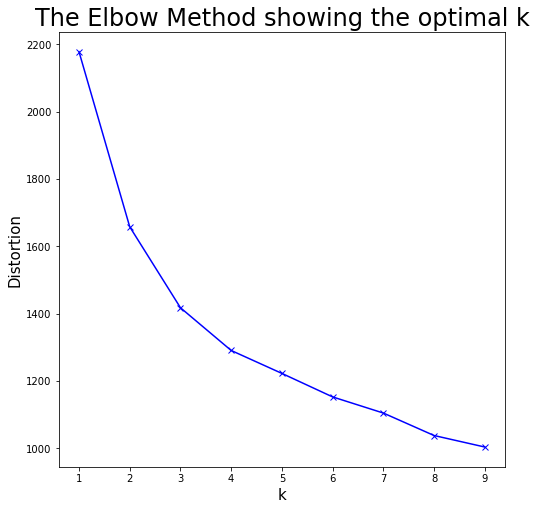

In [56]:
distortions = []                                          # A list to store distortions.
K = range(1,10)                                           # Range of K values.
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')    # kmeans object.
    kmeanModel.fit(clustered_dataset)                     # Fit the model.
    distortions.append(kmeanModel.inertia_)               # Get the distortions.

plt.figure(figsize=(8,8))                                 # Figure Size.
plt.plot(K, distortions, 'bx-')                           # Plot Figure.
plt.xlabel('k', fontsize=15)                              # X-label.
plt.ylabel('Distortion', fontsize=15)                     # Y-label.
plt.title('The Elbow Method showing the optimal k', fontsize=24) # Title.
plt.show()                                                # Show the graph.

#### Model k-means using the optimum k-value:

In [57]:
num_clusters = 6                                           # Optimum k-value.
k_means = KMeans(init="k-means++", n_clusters=num_clusters, max_iter=300) # kmeans object.
k_means.fit(clustered_dataset)                              # Fit the model.
labels = k_means.labels_                                    # Get the labels.
print(labels)

[1 1 5 5 5 5 5 3 5 1 1 1 1 5 5 5 5 2 2 2 2 1 3 3 0 4 3 1 0 1 1 2 3 1 2 2 2
 5 3 3 3 3 0 0 0 0 0 3 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 5 0 0 5 5 5 5 3
 5 3 3 5 1 3 3 3 3 3 3 0 3 3 3 0 1 4 4 3 0 4 4 4 0 4 4 4 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 4 4 0 0 0 3 4 4 4 4 4 4 4 4 4 0 4 3 3 0 0 0 4 0 0 0 3 3 3 0
 4 3 4 4 3 0 3 3 0 0 4 0 4 0 0 4 1 5 5 1 5 5 0 5 4 3 5 5 5 1 5 1 4 1 5 4 1
 1 5 3 0 0 3 0 0 5 1 1 3 1]


#### Update the labels to the 'df' dataframe:

In [58]:
df['Labels'] = labels      # Update Labels.
df.head()                  # Display dataframe.

Neighborhood   Latitude  Longitude   Price  Metro  Hospital  \
0          Chowdeswari Ward  13.121710  77.580420  3644.0   5000      1842   
1                    Atturu  13.102805  77.560036  3295.0   5000      1380   
2  Yelahanka Satellite Town  13.090986  77.583920  3900.0   5000       758   
3               Vijnanapura  13.006063  77.669560  5840.0   1655       623   
4              Basavanapura  13.016847  77.715454  4000.0   5000       949   

   Grocery  School  University  Movie  Clothing  Sports  Bank  Kaveri  Labels  
0     3133     525        1007   3427      2617    2408  1272       2       1  
1     1441    1501        1942   2653      1788    2110  1879       2       1  
2     1250     975         807   1271       337     794   524       2       5  
3      744     910         930   1568       727     854   929       0       5  
4      682    1065        1132   3026      2189     760   789       0       5

#### Generate the map with clustered neighborhoods:

In [59]:
map_clusters_k = folium.Map(location= [lati_bngl,longi_bngl], zoom_start=10)      # Folium Map
x=np.arange(num_clusters)                                     # Array                 
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array =  cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]           # Colors array in RED BLUE GREEN range.

markers_colors = []

for lat, lng, poi, cluster in zip(df['Latitude'], df['Longitude'],df['Neighborhood'], df['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters_k)  

map_clusters_k     # Display clustered map.

#### Let us now look at the Clusters:

#### Cluster 1:

In [60]:
df1= df.loc[df['Labels'] == 0, df.columns[[0] + list(range(1, df.shape[1]))]]

#### Cluster 2:

In [61]:
df2= df.loc[df['Labels'] == 1, df.columns[[0] + list(range(1, df.shape[1]))]]

#### Cluster 3:

In [62]:
df3= df.loc[df['Labels'] == 2, df.columns[[0] + list(range(1, df.shape[1]))]]

#### Cluster 4:

In [63]:
df4= df.loc[df['Labels'] == 3, df.columns[[0] + list(range(1, df.shape[1]))]]

#### Cluster 5:

In [64]:
df5= df.loc[df['Labels'] == 4, df.columns[[0] + list(range(1, df.shape[1]))]]

#### Cluster 6:

In [65]:
df6= df.loc[df['Labels'] == 5, df.columns[[0] + list(range(1, df.shape[1]))]]

## 5. Results and Discussions
The following results shall be displayed or analysed:
1. The frequency of prices over 198 neighborhoods can be displayed by a Histogram Chart.
2. The Median of Prices can be shown by a Box Chart.
3. The Price distributions and Kaveri Water supply over weekly basis can be shown with the help of Choropleth Map.
4. A dashboard shall be created to display the analysed details.
5. The Clustered Dataset shall be analysed.

#### Finding the frequency of prices over 198 neighborhoods:

Counts and No of bins are : [ 8 20 15 32 25 33 31 18 13  3], [ 1956.  3524.  5092.  6660.  8228.  9796. 11364. 12932. 14500. 16068.
 17636.].


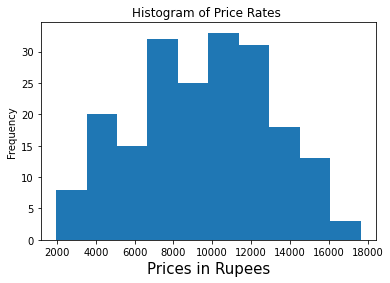

In [72]:
count, n_bins = np.histogram(df['Price'])                      # Get the count and no of bins.
print(f'Counts and No of bins are : {count}, {n_bins}.')             # Print the Count and Bins.
fig_hist = df['Price'].plot(kind='hist', title = 'Histogram of Price Rates ') # Plot the Histogram.
plt.xlabel('Prices in Rupees', fontsize =15) # X-label
plt.savefig('fig_hist.jpeg') # Save Figure as JPEG.
plt.show()                   # Show Figure.

#### Find the Median of Prices using a Box Chart:

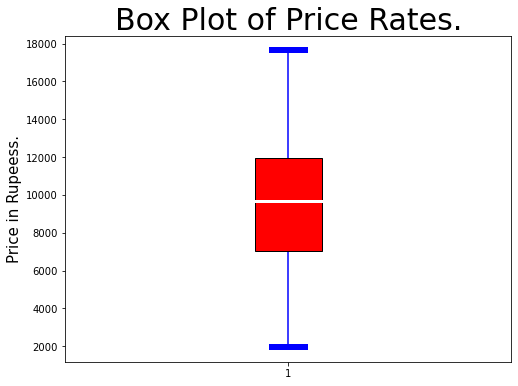

In [73]:
fig_box = plt.figure(figsize =(8, 6))  # Figure size.
ax = fig_box.add_subplot(111)          # Subplot is used because to give colors to the plot as it can be iterable.
fig_box = ax.boxplot(df['Price'], patch_artist=True, vert=1) # Plot the box chart.
plt.title('Box Plot of Price Rates.',  fontsize= 30)               # Title.
plt.ylabel('Price in Rupeess.', fontsize= 15)                      # Y-Label

for whisker in fig_box['whiskers']:                                # Add color to whisker.
    whisker.set(color ='blue',linewidth = 1.5)
for cap in fig_box['caps']:                                        # Add color to cap.
    cap.set(color ='blue', linewidth = 6) 
for median in fig_box['medians']:                                  # Add color to median.
    median.set(color ='white',linewidth = 3) 
for patch in fig_box['boxes']:                                     # Add color to patch.
    patch.set_facecolor(color='red') 
plt.show()                                                         # Display plot.

###### It can be concluded that the median price per sq. ft. in Bengaluru is arround 10000 Rupees per SQ. FT.

#### Mapping a Choropleth map for price distriibution:

In [74]:
bng_geo = r'BNG.json'         # geojson file of map of Bengaluru 198 wards.
bng_map_price = folium.Map(location=[lati_bngl, longi_bngl], zoom_start=10) # Create a plain world map for price.

In [75]:
# Generate choropleth map using the price data.
bng_map_price.choropleth(
    geo_data=bng_geo,  data=df,  columns=['Neighborhood', 'Price'],
    key_on='feature.properties.WARD_NAME',  fill_color='YlGnBu',   fill_opacity=0.7,  line_opacity=0.1,
    legend_name='Bengaluru Price Rates in Rupees.' )
bng_map_price   # Display Map.

#### Mapping a Choropleth map for water avaliability in a week:

In [76]:
bng_map_kaveri = folium.Map(location=[lati_bngl, longi_bngl], zoom_start=10) # Create a plain world map for water.

In [77]:
# Generate choropleth map using the kaveri water data.
bng_map_kaveri.choropleth(
    geo_data=bng_geo,  data=df_prox,  columns=['Neighborhood', 'Kaveri Water Avaliability (No of days in a week)'],
    key_on='feature.properties.WARD_NAME', fill_color='YlOrBr', fill_opacity=0.7, line_opacity=0.1,
    legend_name='Bengaluru Kaveri Water Distribution based on days in a week.')

bng_map_kaveri   # Display Map

#### Generating a list and dataframe column which will be used for dashboard dropdown:

In [78]:
# Dataframe Options
li=[]                                        # Empty List.
for i in range(1,df_prox.shape[0]+1):
    li.append('OPT{}'.format(i))             # append list with values such as OPT1, OPT2 ,OPT3 etc.
df_prox['Options'] = li                      # This is used in the function part of Dash.

# Option list 
li_options=[]                                # Empty List.
for i, j in zip(df_prox['Neighborhood'],df_prox['Options']):
    di={}
    di['label'] = i
    di['value'] = j
    li_options.append(di)            # append list with dictionary of {'label':'Neighborhood','value':'Options'}.

In [79]:
df_prox.head(1)

Neighborhood Price in Rs per SQ.FT.  \
0  Chowdeswari Ward                   3644   

                                       Metro Closeby  \
0  No Venues Found. Venues are Greater than the p...   

                                    Hospital Closeby  \
0  Neha Prakash Hospital\n (Hospital) \n Proximit...   

                                     Grocery Closeby  \
0  royalmart SUPERMARKET\n (Supermarket) \n Proxi...   

                                     Schools Closeby  \
0  Kendriya Vidyalaya Crpf\n (School) \n Proximit...   

                      Movie Theaters Closeby  \
0  Imax\n (Multiplex) \n Proximity: 3427 mts   

                              Clothing Store Closeby  \
0  Jockey @Yelahanka\n (Clothing Store) \n Proxim...   

                               University Closeby  \
0  sadanand\n (University) \n Proximity: 1007 mts   

                              Sports Center Closeby  \
0  Physique Body gym\n (Gym) \n Proximity: 2408 mts   

                                    Bank Closeby  \
0  HDFC Bank ATM\n (Bank) \n Proximity: 1272 mts   

   Kaveri Water Avaliability (No of days in a week)  Population Options  
0                                                 2       19626    OPT1

#### Lets define a list with values of column names of 'df_prox'

In [80]:
col_dash = ['Neighborhood','Price in Rs per SQ.FT.','Metro Closeby','Hospital Closeby','Grocery Closeby',
           'Schools Closeby','Movie Theaters Closeby', 'Clothing Store Closeby','University Closeby', 
           'Sports Center Closeby','Bank Closeby' ,'Kaveri Water Avaliability (No of days in a week)','Population']

#### Generating a Dashboard:
        1. This dash board will have a dropdown which will show all the neighborhood.
        2. The end-user can select a neighborhood.
        3. After selection a table of the neighborhoods details like price, venues closeby, water source and                  population will be displayed.
        4. Also the two choropleth map and the clustered map will be displayed.

#### First let's save the three maps into a html file extension:

In [81]:
str1= 'bng_map_price.html'   # A string with .html extension.
str2= 'bng_map_kaveri.html'  # A string with .html extension.
str3 = 'map_clusters_k.html' # A string with .html extension.
bng_map_price.save(str1)     # Save File.
bng_map_kaveri.save(str2)    # Save File.
map_clusters_k.save(str3)    # Save File.

In [84]:
# Create a dash application
app = JupyterDash(__name__)
JupyterDash.infer_jupyter_proxy_config()
JupyterDash.infer_jupyter_proxy_config()

# REVIEW1: Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

app.layout = html.Div(children = [html.H1('Bengaluru Real Estate Information', style = {'textalign':'center',
                                    'color': '#503D36', 'font-size':'40'}), 
                                  
                    html.Div([
                                    # Add an division
                        html.Div([
                                    
                            html.Div([html.H2('Choose Neighborhood:', style={'margin-right': '2em'}),]),
                             dcc.Dropdown(id='input-type',options=li_options, placeholder='Select a Neighborhood',
                    style={'width':'80%', 'padding':'3px', 'font-size': '20px', 'text-align-last' : 'center'})
                                        ], style={'display':'flex'}),  
                                
                                html.Div([ ], id='table1'), 
                        
                        
                        html.H2('Bengaluru Real Estate Price Choropleth Map', style = {'textalign':'center',
                                    'color': 'green', 'font-size':'30'}),
                                html.Div([ ], id ='plot1'),
                         html.H2('Bengaluru Kaveri Water Choropleth Map', style = {'textalign':'center',
                                    'color': 'royalblue', 'font-size':'40'}),
                                html.Div([ ], id ='plot2'),
                         html.H2('Bengaluru Clustered Map By K-Means Clustering', style = {'textalign':'center',
                                    'color': 'violet', 'font-size':'50'}),
                                html.Div([ ], id ='plot3')
                        
    
                        
                            ]) 
                                 
                        ])

@app.callback([Output(component_id='table1', component_property='children'),
               Output(component_id='plot1', component_property='children'),
               Output(component_id='plot2', component_property='children'),
               Output(component_id='plot3', component_property='children'),
              ],
              
              [Input(component_id='input-type', component_property='value')],
              
              [State("table1", 'children'), State("plot1", 'children'),
               State("plot2" , 'children'), State("plot3", 'children'),
               ]
             )

def get_ouput(option, c1, c2, c3, c4):
    n = int(option[3:])

    figu = go.Figure(data=[go.Table(header=dict(values=col_dash, fill_color='royalblue',font=dict(color='white', size=12)),
                 cells=dict(values=[df_prox['Neighborhood'][n-1], df_prox['Price in Rs per SQ.FT.'][n-1], 
                        df_prox['Metro Closeby'][n-1],  df_prox['Hospital Closeby'][n-1], 
                        df_prox['Grocery Closeby'][n-1], df_prox['Schools Closeby'][n-1],
                        df_prox['Movie Theaters Closeby'][n-1], df_prox['Clothing Store Closeby'][n-1],
                    df_prox['University Closeby'][n-1], df_prox['Sports Center Closeby'][n-1],
                                    df_prox['Bank Closeby'][n-1],df_prox['Kaveri Water Avaliability (No of days in a week)'][n-1],
                            df_prox['Population'][n-1],
                                    
                       ],line_color='black',
                         fill=dict(color=['lightcyan','whitesmoke']),
                           align='left',font_size=12,font=dict(color='black', size=12) )),
                          ])
    
    return [dcc.Graph(figure =figu), 
            html.Iframe(srcDoc = open(str1, 'r').read(), height =550, width =1300,
                                    title=' Bengaluru Price Distribution', style={'textalign':'center'}),
            html.Iframe(srcDoc = open(str2, 'r').read(), height =550, width =1300,
                                    title=' Kaveri Water Distribution', style={'textalign':'center'}),
            html.Iframe(srcDoc = open(str3, 'r').read(), height =550, width =1300,
                                    title=' Bengaluru Real Estate Clustering', style={'textalign':'center'}),          
            ]

        

if __name__ == '__main__':
    # REVIEW8: Adding dev_tools_ui=False, dev_tools_props_check=False can prevent error appearing before calling callback function
    app.run_server(mode="inline", host="localhost", debug=True, dev_tools_ui=False, dev_tools_props_check=False)

#### Lets analyse the clusters:

##### Cluster 1:

In [85]:
print('The size of dataframe is :', df1.shape) # See the size of Cluster 1
price_mean_1 = df1['Price'].mean()
print('The Average Price of Cluster 1 is: ',round(price_mean_1,1))
print('Average Distance Metro: ',round(df1['Metro'].mean(),1))
print('Average Distance Hospital: ',round(df1['Hospital'].mean(),1))
print('Average Distance Grocery Store: ',round(df1['Grocery'].mean(),1))
print('Average Distance School: ',round(df1['School'].mean(),1))
print('Average Distance University: ',round(df1['University'].mean(),1))
print('Average Distance Movie: ',round(df1['Movie'].mean(),1))
print('Average Distance Clothing: ',round(df1['Clothing'].mean(),1))
print('Average Distance Sports Center: ',round(df1['Sports'].mean(),1))
print('Average Distance Bank: ',round(df1['Bank'].mean(),1))
df1.head(df1.shape[0])

The size of dataframe is : (53, 15)
The Average Price of Cluster 1 is:  11380.3
Average Distance Metro:  1906.4
Average Distance Hospital:  441.5
Average Distance Grocery Store:  1065.9
Average Distance School:  508.2
Average Distance University:  941.4
Average Distance Movie:  1320.5
Average Distance Clothing:  848.1
Average Distance Sports Center:  785.8
Average Distance Bank:  448.0


Neighborhood   Latitude  Longitude     Price  Metro  Hospital  \
24             Yeshwanthpura  13.026029  77.553856  10678.00   2730       584   
28              Kottegepalya  12.982456  77.514090   8478.55   2839       371   
42   Shakthi Ganapathi Nagar  12.995048  77.531586  12111.20   2748       219   
43              Shankar Matt  12.999985  77.534410  13151.24   3097       543   
44            Aramane Nagara  13.015349  77.577020  10875.00   2766      1274   
45                 Mattikere  13.032590  77.561035   7480.00   3120       252   
46               Malleswaram  13.014073  77.561676  12470.00   2734       588   
48      Kadu Malleshwar Ward  13.002385  77.568490   9568.00   1270       384   
49          Subramanya Nagar  13.007040  77.557106  10546.00   2312       308   
50            Gayithri Nagar  12.997437  77.560520   9986.00   1323       526   
67                HBR Layout  13.032021  77.630130  12230.44   5106       412   
68                Banasavadi  13.014699  77.648926  11254.60   2378       174   
85            Bharathi Nagar  12.987015  77.611040  10540.00   1363       739   
89                    Domlur  12.963362  77.638040  10372.00   1660       309   
94                 Jogupalya  12.973724  77.632590  11974.00    724       429   
98         Dattatreya Temple  12.996555  77.574135  13570.00    689       459   
102       Basaveshwara Nagar  12.990808  77.542130  13111.25   1876       255   
103            Kamakshipalya  12.986797  77.533875   6671.00   1827       409   
104              Shivanagara  12.988503  77.549520  12653.40   1590       486   
105            Sriramamandir  12.983768  77.555890  14297.00    901       155   
106          Dayananda Nagar  12.991097  77.564190  14709.00    729       569   
107            Prakash Nagar  12.993094  77.558220  14237.00   1392       327   
108             Rajaji Nagar  12.994598  77.550190  16402.56   2197       102   
109               Kaveripura  12.979742  77.524895   7607.00   1681       819   
110        Govindaraja Nagar  12.977117  77.536680   8110.00    714       609   
111     Agrahara Dasarahalli  12.980497  77.541534   7817.00    803       461   
112       Dr. Raj Kumar Ward  12.979654  77.548480   8113.00    702       419   
113              Marenahalli  12.971889  77.532845   8519.00    503       461   
114      Maruthi Mandir ward  12.966710  77.528465   7745.00   1061       499   
115              Mudalapalya  12.969239  77.521640   7586.20   1710       303   
116              Nagarabhavi  12.955843  77.519360   9490.22   1569       353   
120                Hosahalli  12.967670  77.543816   9420.20    743       289   
121                Attiguppe  12.958112  77.529310  12000.00   1056       216   
122              Hampi Nagar  12.959949  77.537610  10540.00    869       671   
133            Sudham Nagara  12.959335  77.586190  12359.00   1224       660   
137                Siddapura  12.943845  77.593020  13492.00   1418       351   
138        Hombegowda Nagara  12.950596  77.594870  12513.00   1673       349   
139                Jayanagar  12.937634  77.589420  13811.00   1037       266   
141                 Srinagar  12.945328  77.553500  11545.20   1955       360   
142             Basavanagudi  12.937375  77.568730  15527.67   1215       624   
143                Girinagar  12.937624  77.545580  12000.00   1872       314   
147       Ganesh Mandir ward  12.924803  77.564050   8965.60   1485       204   
153              Lakkasandra  12.941109  77.604805  10325.68   2720       878   
156              Koramangala  12.931340  77.624650  17636.00   4699       402   
157         Suddagunte Palya  12.929972  77.608215   9563.20   3049       540   
159              Jakkasandra  12.920591  77.630990  12560.20   5000       479   
161        Pattabhiram Nagar  12.924545  77.587550  12387.45    851       635   
162               Byrasandra  12.931598  77.588940  11461.36    978       142   
170               HSR Layout  12.913718  77.646

##### Discussion:
1. The average Price of Cluster 1 is Rs 11380.3.
2. These wards have Average metro proximity of 2 Kms.
3. Hospitals, Schools, Sports Center, Clothing Store, Grocery Store, University and Banks have average proximity of less than 1 kms.
4. Movie Theaters have an average proximity of 1.3 kms.
4. These areas get Kaveri water 4 days in a week.


##### Cluster 2:

In [86]:
print('The size of dataframe is :', df2.shape) # See the size of Cluster 2
price_mean_2 = df2['Price'].mean()
print('The Average Price of Cluster 2 is: ',round(price_mean_2,2))
print('Average Distance Metro: ',round(df2['Metro'].mean(),2))
print('Average Distance Hospital: ',round(df2['Hospital'].mean(),2))
print('Average Distance Grocery Store: ',round(df2['Grocery'].mean(),2))
print('Average Distance School: ',round(df2['School'].mean(),2))
print('Average Distance University: ',round(df2['University'].mean(),2))
print('Average Distance Movie: ',round(df2['Movie'].mean(),2))
print('Average Distance Clothing: ',round(df2['Clothing'].mean(),2))
print('Average Distance Sports Center: ',round(df2['Sports'].mean(),2))
print('Average Distance Bank: ',round(df2['Bank'].mean(),2))
df2.head(df2.shape[0])

The size of dataframe is : (23, 15)
The Average Price of Cluster 2 is:  5438.55
Average Distance Metro:  3788.87
Average Distance Hospital:  1284.87
Average Distance Grocery Store:  1760.22
Average Distance School:  1609.57
Average Distance University:  1952.13
Average Distance Movie:  2393.91
Average Distance Clothing:  2078.35
Average Distance Sports Center:  1520.09
Average Distance Bank:  1140.22


Neighborhood   Latitude  Longitude     Price  Metro  Hospital  \
0     Chowdeswari Ward  13.121710  77.580420   3644.00   5000      1842   
1               Atturu  13.102805  77.560036   3295.00   5000      1380   
9          HAL Airport  12.956536  77.671500   8783.00   4308       734   
10   Dodda Bommasandra  13.056595  77.558690   7500.00   3292       824   
11       Kuvempu Nagar  13.072080  77.541870   6956.28   3657      1501   
12             Jakkuru  13.096251  77.623314   7118.00   5000      1900   
21           Jalahalli  13.046444  77.539340   3931.30    943      1119   
27             Laggere  13.007688  77.523900   4951.20   3672       670   
29         Shettihalli  13.067997  77.519410   4875.63   3092       697   
30         Mallasandra  13.054437  77.515130   4258.26   1619      1299   
33        Chokkasandra  13.038051  77.506310   3989.90   1329       899   
78      Sarvagna Nagar  12.989170  77.631040   7015.00   1466      1404   
90              Agaram  12.944263  77.639046  11545.00   3785      1792   
164           Varthuru  12.935373  77.733610   2146.89   5000      2360   
167           Kadugodi  12.990687  77.757910   2152.00   5000      1378   
177        Singasandra  12.881166  77.657650   7445.00   5000      1456   
179        Uttarahalli  12.900265  77.537080   6912.11   2693       838   
181              Begur  12.865000  77.622070   5362.67   5000      1926   
184         Anjanapura  12.859588  77.563286   5149.44   2801       900   
185    Kempegowda Ward  13.116188  77.599720   3876.00   5000       733   
194   Ramamurthy Nagar  13.033613  77.676540   6031.00   4652      1453   
195           Horamavu  13.044561  77.653275   5258.89   5483       974   
197        Hemmigepura  12.891903  77.505010   2890.00   4352      1473   

     Grocery  School  University  Movie  Clothing  Sports  Bank  Kaveri  \
0       3133     525        1007   3427      2617    2408  1272       2   
1       1441    1501        1942   2653      1788    2110  1879       2   
9       1619    1237        1853   2403      1602     633  1328       0   
10       745    1177        1777   1420      2279    1541   873       2   
11      1474    2066        1283    393      1885    1437  1284       2   
12      2337    1647        2586   2992      3019    2410  1856       2   
21      1476    1358        1863   2395      2273    1261  1035       1   
27      2565    1524        2688   2281      2174     293  1025       1   
29       744    3000        1738   3074      3017    1200  1220       1   
30      2234    2753        1853   1595      1517    1989   853       1   
33      2623    2813        1364   1309      1236     993  1184       1   
78      2843    1282        1982   1375      1399    1391   979       1   
90      1874    1586        1723   2524      1367     891   778       4   
164      743     910        3127   3110      1289    2480   936       0   
167     1011    1069        1152   2500      2321     895   795       0   
177     1381    1356        1090   2115      1708     737  1062       1   
179     1113    1482        2846   3009      1017    1332   975       2   
181     1221    2112        2863   3125      2882    1369  1004       2   
184     1707    2706        2864   3519      3048    1750  1169       0   
185     2487    1250         697   2466      2501    1404  1420       2   
194     1419    1330        3408   1616      2209    2286   888       0   
195     1420    1008        1901   2873      2498    1469   931       0   
197     2875    1328        1292   2886      2156    2683  1479       1   

     Labels  
0         1  
1         1  
9         1  
10        1  
11        1  
12        1  
21        1  
27        1  
29        1  
30        1  
33        1  
78        1  
90        1  
164       1  
167       1  
177       1  
179       1  
181       1  
184       1  
185       1  
194       1  
195       1  
197       1

##### Discussion:
1. The average Price of Cluster 2 is Rs. 5438.55
2. These wards have Average Metro Proximity of 3.8  Kms.
3. Banks and Hospitals have an average proximity of 1.2 Kms.
4. Other venues have average proximity between 1.6 - 2.3 Kms.
4. These areas get Kaveri water in a week for more than 2-1 days in a week.

##### Cluster 3:

In [87]:
print('The size of dataframe is :', df3.shape) # See the size of Cluster 3
price_mean_3 = df3['Price'].mean()
print('The Average Price of Cluster 3 is: ',round(price_mean_3,1))
print('Average Distance Metro: ',round(df3['Metro'].mean(),1))
print('Average Distance Hospital: ',round(df3['Hospital'].mean(),1))
print('Average Distance Grocery Store: ',round(df3['Grocery'].mean(),1))
print('Average Distance School: ',round(df3['School'].mean(),1))
print('Average Distance University: ',round(df3['University'].mean(),1))
print('Average Distance Movie: ',round(df3['Movie'].mean(),1))
print('Average Distance Clothing: ',round(df3['Clothing'].mean(),1))
print('Average Distance Sports Center: ',round(df3['Sports'].mean(),1))
print('Average Distance Bank: ',round(df3['Bank'].mean(),1))
df3.head(df3.shape[0])

The size of dataframe is : (8, 15)
The Average Price of Cluster 3 is:  4626.3
Average Distance Metro:  4090.5
Average Distance Hospital:  2184.5
Average Distance Grocery Store:  2707.9
Average Distance School:  2816.5
Average Distance University:  1076.1
Average Distance Movie:  2159.8
Average Distance Clothing:  2603.2
Average Distance Sports Center:  2163.0
Average Distance Bank:  788.8


Neighborhood   Latitude  Longitude    Price  Metro  Hospital  \
17                  Ullalu  12.946716   77.48462  5523.45   4162      2907   
18                 Kengeri  12.915069   77.47752  3381.67   4680      2532   
19       Dodda Bidarakallu  13.018076   77.48454  4235.00   4420      3000   
20               Herohalli  12.982807   77.48716  3896.55   5606       845   
31             Bagalakunte  13.058892   77.50028  4696.30   2856      1279   
34  Peenya Industrial Area  13.020902   77.50861  5180.11   2398      2499   
35         Rajagopal Nagar  13.006200   77.51225  6234.14   3846      1925   
36            Hegganahalli  13.001005   77.50098  3863.00   4756      2489   

    Grocery  School  University  Movie  Clothing  Sports  Bank  Kaveri  Labels  
17     2445    2023         923    842      3238    2801   491       2       2  
18     1495    3000         435    202      3000    1754   427       4       2  
19     3000    3000        1818   2251      3525    3000  2632       1       2  
20     2566    2638         777   3225      2288    2382   867       1       2  
31     3039    3000         922   2825      2718    1608   739       1       2  
34     3206    3065        1463   2404      2425    1955    14       1       2  
35     3327    2763        1479   3495      2055    1227   757       1       2  
36     2585    3043         792   2034      1577    2577   383       1       2

##### Discussion:
1. The average Price of Cluster 3 is Rs. 4626.3.
2. These wards have Metro proximity greater than 4.0 Kms.
3. Most Facilities are situated far away by more than 2.0 Kms.
4. Only Banks and University are within 1Kkms.
5. These areas get Kaveri water in a week for less than 2 days in a week.
6. These neighborhoods are far from metro and city.

##### Cluster 4:

In [88]:
print('The size of dataframe is :', df4.shape) # See the size of Cluster 4
price_mean_4 = df4['Price'].mean()
print('The Average Price of Cluster 4 is: ',round(price_mean_4,1))
print('Average Distance Metro: ',round(df4['Metro'].mean(),1))
print('Average Distance Hospital: ',round(df4['Hospital'].mean(),1))
print('Average Distance Grocery Store: ',round(df4['Grocery'].mean(),1))
print('Average Distance School: ',round(df4['School'].mean(),1))
print('Average Distance University: ',round(df4['University'].mean(),1))
print('Average Distance Movie: ',round(df4['Movie'].mean(),1))
print('Average Distance Clothing: ',round(df4['Clothing'].mean(),1))
print('Average Distance Sports Center: ',round(df4['Sports'].mean(),1))
print('Average Distance Bank: ',round(df4['Bank'].mean(),1))
df4.head(df4.shape[0])

The size of dataframe is : (40, 15)
The Average Price of Cluster 4 is:  9760.9
Average Distance Metro:  2011.0
Average Distance Hospital:  614.0
Average Distance Grocery Store:  2519.7
Average Distance School:  655.1
Average Distance University:  1088.8
Average Distance Movie:  1009.9
Average Distance Clothing:  852.8
Average Distance Sports Center:  538.2
Average Distance Bank:  433.6


Neighborhood   Latitude  Longitude     Price  Metro  Hospital  \
7          A Narayanapura  12.994474  77.672585   5100.00   1507       610   
22   Rajarajeshwari Nagar  12.918757  77.522140   8796.56   1192       821   
23               J P Park  13.036629  77.552420   8247.55   2106       474   
26     Lakshmi Devi Nagar  13.020603  77.532470  10233.00   2193      1176   
32          T Dasarahalli  13.045358  77.514730   3566.67    693       326   
38         Nandini Layout  13.013450  77.534140  10023.65   2988       485   
39        Marappana Palya  13.017480  77.546240  10285.00   2897       874   
40               Nagapura  13.004127  77.548134   9856.20   2858       217   
41       Mahalakshimpuram  13.007350  77.540040  13414.89   3730       737   
47   Rajamahal Guttahalli  13.001372  77.579060  11456.85   1434       376   
63          Sagayarapuram  13.005577  77.616870  11912.00   3438       239   
64             S K Garden  13.005327  77.607056  11370.00   2944       478   
65         Pulikeshinagar  12.995343  77.611855  12201.00   2247        51   
73     Maruthi Seva Nagar  12.999921  77.630080   7092.00   2582      1432   
75         Benniganahalli  12.999501  77.651700   7793.00    878       665   
76        C V Raman Nagar  12.983950  77.665200   7579.00   1473      1218   
79          Hoysala Nagar  12.978457  77.638790   7205.00     27       111   
80      Jeevanbhima Nagar  12.964652  77.650030   7603.00   1955       599   
81      Sampangiram Nagar  12.976794  77.595375  10351.00    449       703   
82        Ramaswamy Palya  13.005976  77.599075  10319.00   2845       562   
83              Jayamahal  12.995107  77.599930  10869.00   1648       244   
84                Halsoor  12.979704  77.619820  10539.00    798      1186   
86          Shivaji Nagar  12.988702  77.605870  11748.00   1264       243   
87          Vasanth Nagar  12.989131  77.585810  11222.00   1311       598   
88         Shantala Nagar  12.969867  77.606460  11513.00    627       340   
93          Shanthi Nagar  12.957324  77.603710  10134.00   2049       754   
123          Bapuji Nagar  12.957976  77.543220   9632.00    942      1088   
135          Sunkenahalli  12.948691  77.567870  13464.00    590       292   
136    Vishveshwara Puram  12.950486  77.579880  12243.00    487       524   
144            Katriguppe  12.931642  77.552220  11233.65   2825       647   
145       Vidyapeeta ward  12.934200  77.559480  11536.45   2261       447   
146         Hosakerehalli  12.927797  77.539505   6056.20   2303       551   
149               Yediyur  12.934252  77.576080   9475.32    615       668   
152      Padmanabha Nagar  12.913502  77.556060  10536.20   1919       300   
154               Adugodi  12.943239  77.613080  10963.42   3339       844   
155               Ejipura  12.942316  77.627040   8988.80   3568       801   
173          Puttenahalli  12.897318  77.590610   9130.00   2222       880   
187   Jnana Bharathi ward  12.959306  77.501785   6608.00   3405       855   
190         Chikkalsandra  12.921685  77.548410  10124.00   2830       263   
196          Marathahalli  12.950743  77.691500  10016.56   5000       880   

     Grocery  School  University  Movie  Clothing  Sports  Bank  Kaveri  \
7       1904    1090         536    843       950     899   647       0   
22      1673     757        1875   1192       250     206   497       1   
23      1507    1325         587   1445      1430     560   354       1   
26      2951     892        2074   1807      1811     916    29       1   
32      3177    2154        1578    663       563    1609   640       1   
38      2576     263        2284   1634      1912     295   257       2   
39      1454     318        1062    790       804     695   484       2   
40      1274     405        1305    453       784     314   230       2   
41      1955     157        1786    701      1317     424   302       2   
47      2537     741        1676   1112       713     560   335 

##### Discussion:
1. The average Price of Cluster 4 is Rs. 9760.9.
2. These wards have average Metro proximity of 2.0 Kms.
3. All Facilities are having an average proximity of 1.0 Kms.
4. These areas get Kaveri water in a week for less than 4 days in a week.
5. These neighborhoods are within the heart of the city.


##### Cluster 5

In [89]:
print('The size of dataframe is :', df5.shape) # See the size of Cluster 5
price_mean_5 = df5['Price'].mean()
print('The Average Price of Cluster 5 is: ',round(price_mean_5,1))
print('Average Distance Metro: ',round(df5['Metro'].mean(),1))
print('Average Distance Hospital: ',round(df5['Hospital'].mean(),1))
print('Average Distance Grocery Store: ',round(df5['Grocery'].mean(),1))
print('Average Distance School: ',round(df5['School'].mean(),1))
print('Average Distance University: ',round(df5['University'].mean(),1))
print('Average Distance Movie: ',round(df5['Movie'].mean(),1))
print('Average Distance Clothing: ',round(df5['Clothing'].mean(),1))
print('Average Distance Sports Center: ',round(df5['Sports'].mean(),1))
print('Average Distance Bank: ',round(df5['Bank'].mean(),1))
df5.head(df5.shape[0])

The size of dataframe is : (32, 15)
The Average Price of Cluster 5 is:  12233.6
Average Distance Metro:  1068.7
Average Distance Hospital:  689.2
Average Distance Grocery Store:  2607.9
Average Distance School:  685.9
Average Distance University:  1633.6
Average Distance Movie:  1182.2
Average Distance Clothing:  1319.9
Average Distance Sports Center:  1725.3
Average Distance Bank:  662.2


Neighborhood   Latitude  Longitude     Price  Metro  \
25                    HMT Ward  13.031905  77.531710  11563.25    950   
91                   Vannarpet  12.954209  77.618940  11854.00   2093   
92                  Nilasandra  12.951159  77.614650  10504.00   2442   
95                   Chickpete  12.970688  77.577095  14851.00    479   
96                  Cottonpete  12.970359  77.566284  13646.00    615   
97                   Binnipete  12.971799  77.559100  13503.00    517   
99                 Gandhinagar  12.981565  77.575670  14840.00    756   
100              Subhash Nagar  12.982667  77.568630  13973.00    790   
101                 Okalipuram  12.982783  77.563820  14084.00    796   
117               Nayandahalli  12.945141  77.519960   8542.10   1146   
118         Kempapura Agrahara  12.972313  77.555480   8956.20    377   
119                Vijayanagar  12.972093  77.547040  15346.00    310   
124  Gali Anjenaya Temple ward  12.950159  77.544655  10654.20    870   
125           Deepanjali Nagar  12.944540  77.536230  11203.00    677   
126             Padarayanapura  12.963702  77.548810  14630.00   1234   
127         Jagajivanaramnagar  12.960545  77.551940  14721.00   1689   
128                  Rayapuram  12.964988  77.556380  14850.00   1190   
129             Chalavadipalya  12.964580  77.564445  14100.00   1159   
130                 K R Market  12.963968  77.571800  14502.00    470   
131                Chamrajapet  12.958184  77.563774  15370.00   1243   
132                 Azad Nagar  12.954717  77.554020  15163.00   1878   
134    Dharmaraya Swamy Temple  12.963133  77.580510  12996.00    665   
140            Hanumanth Nagar  12.947122  77.559880  11465.35   1474   
148                 Karisandra  12.924353  77.574020   9655.20    764   
150   Banashankari Temple ward  12.913351  77.569830   8654.23    468   
151         Kumaraswamy Layout  12.906990  77.561860   9923.22   1207   
158                    Sarakki  12.907940  77.582950  12560.00   1083   
160                 BTM Layout  12.911838  77.609344  15512.50   3317   
163           Shakambari Nagar  12.917089  77.579770  11453.42    485   
172              Jaraganahalli  12.900421  77.577490   9657.00    923   
180              Yelchenahalli  12.900229  77.567020   5100.00    561   
183                 Konankunte  12.885775  77.579900   7641.67   1571   

     Hospital  Grocery  School  University  Movie  Clothing  Sports  Bank  \
25        919     3291     470        1614   1749      1858    1793   787   
91        689     2023     186        2032   1503      1989    1488   421   
92        266     2585     124        1650   1679      1619    1307   913   
95        438     3321     634        1100    367       178    1390   178   
96        578     2428     768        1748    696       951    1623   433   
97        737     1838     755        1943    728      1746    1788  1216   
99        706     2727     934        1409   1146       944    1677   196   
100      1092     1954    1150        1191    596      1021    1808   685   
101       692     1444     692        1344    625      1250    1918  1093   
117      1422     2664     935        1856   1820      1054     948  1072   
118       736     1631     600        2277    447      2142    1458  1540   
119       369     1639     734         879    526      2377     945   633   
124      1040     3152     854        1024   1322      2349     472   773   
125       102     3187     473         524   2424      1884    1129   822   
126       934     2527    1219        2554    816      1441    1082   755   
127      1406     2869    1489        2177    329      1916     960   367   
128      1335     2443    1411        1793    600      1878     964  1021   
129       560     2824     536        2567    314      1211    1898   931   
130       336     3357     264        2017    858       607    1719   506   
131       749     3423     479        2491    876       775    1281 

##### Discussion:
1. The average Price of Cluster 5 is Rs. 12233.6 .
2. These wards have average Metro proximity of 1.0 Kms.
3. All Facilities are have a average proximity of 1.2 Kms.
4. These areas get Kaveri water in a week for more than 4 days in a week.
5. These neighborhoods are within the heart of the city.

##### Cluster 6

In [90]:
print('The size of dataframe is :', df6.shape) # See the size of Cluster 6
price_mean_6 = df6['Price'].mean()
print('The Average Price of Cluster 6 is: ',round(price_mean_6,1))
print('Average Distance Metro: ',round(df6['Metro'].mean(),1))
print('Average Distance Hospital: ',round(df6['Hospital'].mean(),1))
print('Average Distance Grocery Store: ',round(df6['Grocery'].mean(),1))
print('Average Distance School: ',round(df6['School'].mean(),1))
print('Average Distance University: ',round(df6['University'].mean(),1))
print('Average Distance Movie: ',round(df6['Movie'].mean(),1))
print('Average Distance Clothing: ',round(df6['Clothing'].mean(),1))
print('Average Distance Sports Center: ',round(df6['Sports'].mean(),1))
print('Average Distance Bank: ',round(df6['Bank'].mean(),1))
df6.head(df6.shape[0])

The size of dataframe is : (42, 15)
The Average Price of Cluster 6 is:  7600.3
Average Distance Metro:  4367.9
Average Distance Hospital:  686.9
Average Distance Grocery Store:  1158.6
Average Distance School:  623.5
Average Distance University:  1127.4
Average Distance Movie:  1880.4
Average Distance Clothing:  922.1
Average Distance Sports Center:  898.9
Average Distance Bank:  640.5


Neighborhood   Latitude  Longitude     Price  Metro  \
2    Yelahanka Satellite Town  13.090986  77.583920   3900.00   5000   
3                 Vijnanapura  13.006063  77.669560   5840.00   1655   
4                Basavanapura  13.016847  77.715454   4000.00   5000   
5                        Hudi  13.022375  77.705490   3484.78   5883   
6                  Devasandra  13.001798  77.689125   3986.00   3368   
8               Vijnana Nagar  12.978493  77.681770   4500.00   3140   
13                Thanisandra  13.056525  77.622410   6896.89   5000   
14            Byatarayanapura  13.061070  77.597374  12672.56   5000   
15                Kodigehalli  13.053845  77.579090   7118.70   5183   
16             Vidyaranyapura  13.077092  77.569450   6235.22   5000   
37        Vrisabhavathi Nagar  12.989773  77.525880   9863.45   2456   
51   Radhakrishna Temple Ward  13.038305  77.570570  12481.00   4040   
52              Sanjaya Nagar  13.039301  77.577800  14135.89   4819   
53                Ganga Nagar  13.032555  77.586360  10002.00   4897   
54                    Hebbala  13.034055  77.593020   9140.22   5337   
55     Vishwanath Nagenahalli  13.035174  77.603740  10886.00   6051   
56            Manorayanapalya  13.026743  77.597305   9263.00   4881   
57               Gangenahalli  13.017775  77.588810   9223.00   3536   
58    Jayachamarajendra Nagar  13.017172  77.595980   9610.00   3967   
59               Kushal Nagar  13.016274  77.615020  11799.00   4401   
60          Kaval Bairasandra  13.026351  77.608570  10970.00   5241   
61        Devara Jeevanahalli  13.015453  77.602750  10795.00   3933   
62           Muneshwara Nagar  13.014160  77.610980  11693.00   4014   
66                   Nagavara  13.031509  77.616700   9694.67   6040   
69               Kammanahalli  13.008373  77.635994   6778.70   2847   
70            Kacharkanahalli  13.019417  77.634010   7432.00   3771   
71           Kadugondanahalli  13.015544  77.619865   7103.00   4446   
72              Lingarajapura  13.009946  77.626970   7042.00   3746   
74            Konena Agrahara  12.955780  77.652210   7294.00   2904   
77           New Tippasandara  12.976503  77.656790   7532.00   1979   
165                Bellanduru  12.922874  77.680210   7815.00   5000   
166          Garudachar Playa  12.985901  77.717285   4123.00   5000   
168                   Hagadur  12.966070  77.748370   1956.00   5000   
169            Dodda Nekkundi  12.968183  77.707825   8840.00   5000   
171              Bommanahalli  12.900742  77.621210   6316.00   4990   
174                Bilekhalli  12.899157  77.610160   7652.00   4070   
175               Hongasandra  12.896769  77.627520   4611.20   5000   
176           Mangammanapalya  12.896167  77.641820   7327.00   5000   
178                   Arakere  12.879220  77.602880   7120.00   4023   
182                 Gottigere  12.860591  77.582130   4420.00   4173   
186                 K R Puram  13.017798  77.698440   3158.89   4966   
193                  Madivala  12.920018  77.614420   4500.00   3695   

     Hospital  Grocery  School  University  Movie  Clothing  Sports  Bank  \
2         758     1250     975         807   1271       337     794   524   
3         623      744     910         930   1568       727     854   929   
4         949      682    1065        1132   3026      2189     760   789   
5         271      570     636         153   2958      1879     195   327   
6        1009     1518     806        1337    835       698    1002   945   
8         434      766     598        1220   1303      1002     520   216   
13       1222     2104    1098         885   1316      1322    1420   690   
14        480      514     564        2179    500       631     737   649   
15       1102      635     795        1954    726      1451     329   960   
16       1463     1590    1253        1336   3385      1188    1027   514   
37       1031     1207     879        1280   2451       981     989  1072

##### Discussion:
1. The average Price of Cluster  is  Rs. 7600.3
2. These wards have Metro with average proximity of 4.0 Kms.
3. Facilities like Hospitals schools, clothing store, bank, sports center, university have average proximity of 1.2 Kms.
4. These areas get Kaveri water in a week for less than 2-0 days in a week.
5. These neighborhoods are far from metro and city.

## 6. Conclusions

In this project, The Real Estate Data analysis of Bengaluru was made by utilising data from various sources. Initial raw data was cleaned and venues details were extracted by using Foursquare API. Then the data was clustered by using K-Means Clustering Method. Six groups of clusters were obtained . The average price per square feet was near 10000 Rupees. Choropleth Maps of Price Distribution and Kaver Water Avaliability was Mapped. Finally a Dashboard was created where the end user can select a neighborhood and the details of the neighborhood is shown and importand maps displayed.


The Clustered Data can be grouped as:
1. Cluster 1: 
        Average Price: Rs. 11000            		Rate: 4.0/5       
        Kaveri Water in a week: 4 days      		Rate: 4.0/5
        Excellent Facilities Nearby.        		Rate: 4.5/5
        Far from Metro                     		    Rate: 3.5/5

2. Cluster 2:
        Average Price: Rs. 5400             		Rate: 2.5/5
        Kaveri Water in a week: 2-1 days    		Rate: 2.0/5
        Facilities are quite far.            		Rate: 3.0/5
        Very Far from Metro.                 	    Rate: 1.0/5

3. Cluster 3:
        Average Price: Rs. 4600             		Rate: 2.0/5
        Kaveri Water in a week: 2-0 days    		Rate: 2.0/5
        Facilities are quite far away      			Rate: 3.0/5
        Very Far from Metro.               			Rate: 1.0/5

4. Cluster 4:
        Average Price: Rs. 9700             		Rate: 3.75/5
        Kaveri Water in a week: 3-1 days    		Rate: 3.0/5
        Excellent Facilities Nearby.       			Rate: 2.5/5
        Metro is quite far.                			Rate: 3.0/5
        


5. Cluster 5:
        Average Price: Rs. 12200            		Rate: 4.0/5
        Kaveri Water in a week: 4 days      		Rate: 4.0/5
        Excellent Facilities Nearby.        		Rate: 4.5/5
        Very Near to Metro.                 		Rate: 4.5/5
6. Cluster 6:
        Average Price: Rs. 7600             		Rate: 3.5/5
        Kaveri Water in a week: 2-0 days    		Rate: 2.2/5
        Very Good Facilities Nearby.        		Rate: 4.0/5
        Very Far from Metro.                	    Rate: 1.0/5
        
    Ratings Note:
        1. Price: 5-high to 0-low
        2. Water: 5-Excellent supply to 0-No Supply
        3. Facilities:  5- Very Near to 0- Very Far
        4. Metro:  5- Very Near to 0- Very Far


## 7. Refrences:

1. Land Prices: https://www.99acres.com/property-rates-and-price-trends-in-bangalore
2. Land prices: https://www.makaan.com/price-trends/property-rates-for-buy-in-bangalore
3. Land Prices: https://housing.com/price-trends/property-rates-for-buy-in-bangalore_karnataka-P38f9yfbk7p3m2h1f
4. Land prices: https://www.magicbricks.com/property-for-sale-rent-in-Bangalore/residential-real-estate-Bangalore
5. Bengaluru Wards GeoJson:  https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Bangalore/BBMP.GeoJSON
6. Bengaluru Kaveri Water Supply: https://www.bwssb.gov.in/watter_supply.php
7. Venues Data: Foursquare API
8. Bengaluru wards data:  https://opencity.in/cc2b165a-d44a-49d7-b077-4bc6123ca6ab